# 1. Problem Statement and Goal

Objective: To predict whether a patient has heart disease based on 13 clinical attributes. Goal: Clean the data, explore correlations between health markers (like age and cholesterol), and train a Logistic Regression model. We will evaluate the model's reliability using a Confusion Matrix and an ROC Curve.

# 2. Dataset Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# 1. Load the dataset from your Colab file path
df = pd.read_csv('heart.csv')

# 2. Check for missing values
print("Missing values count:")
print(df.isnull().sum())

# 3. Inspect column names and types
print("\nFirst 5 rows:")
display(df.head())

Missing values count:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 3. Data Visualization and Exploration (EDA)

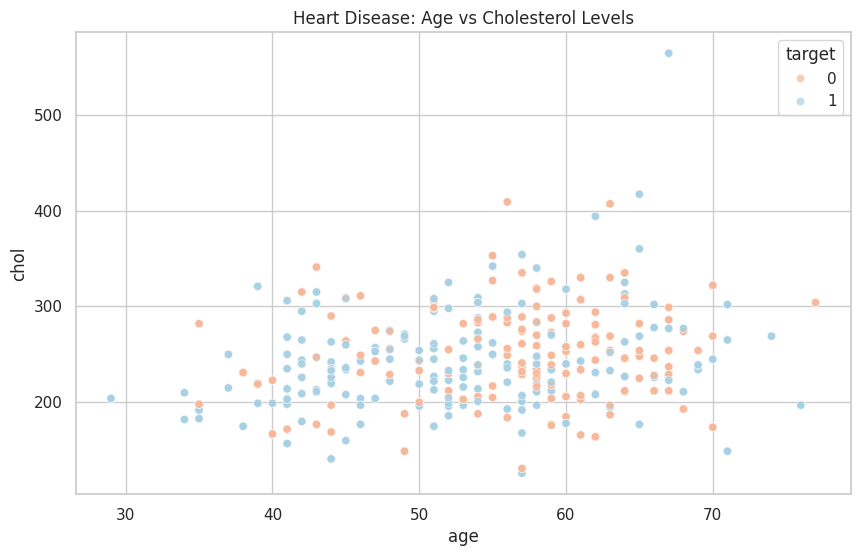

/tmp/ipython-input-578311286.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


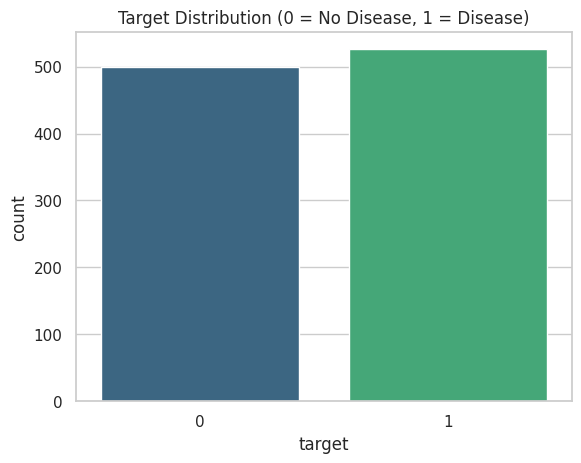

In [2]:
# Set visual style
sns.set_theme(style="whitegrid")

# Relationship: Age vs Cholesterol vs Target
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='target', palette='RdBu', alpha=0.7)
plt.title('Heart Disease: Age vs Cholesterol Levels')
plt.show()

# Distribution of Target (Checking for data balance)
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Target Distribution (0 = No Disease, 1 = Disease)')
plt.show()

# 4. Model Training and Evaluation

In [3]:
# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Logistic Regression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics

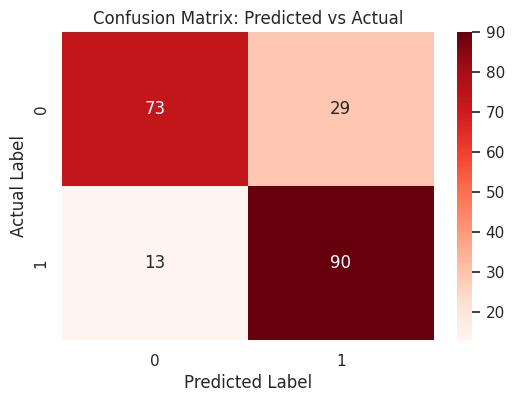

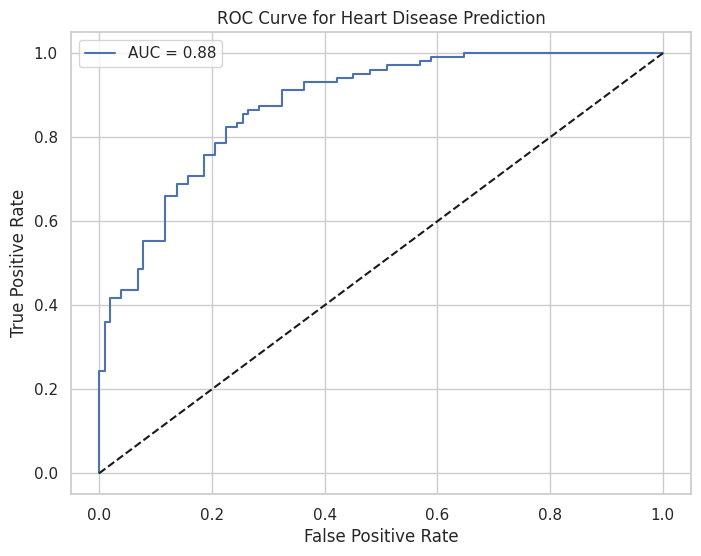

In [4]:
# A. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix: Predicted vs Actual')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# B. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)



plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend()
plt.show()

# 5. Feature Importance and Final Insights

/tmp/ipython-input-2811307598.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='magma')


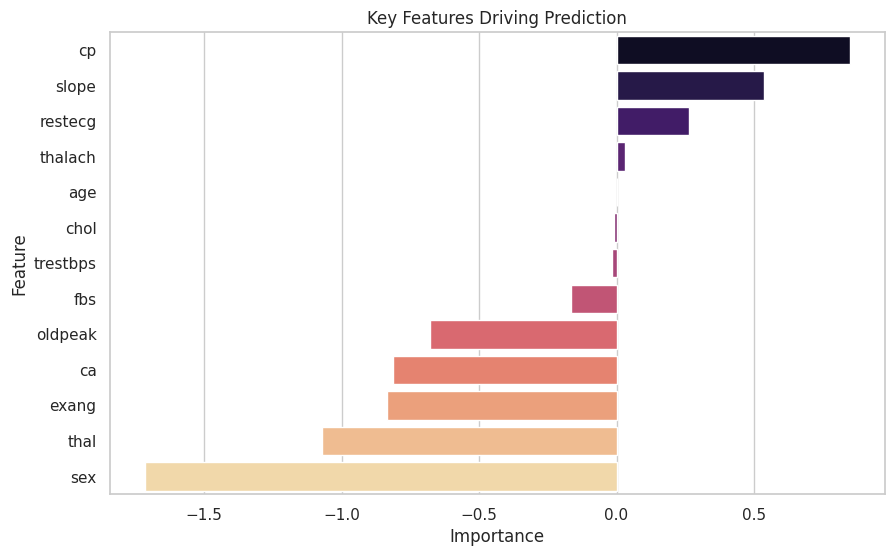

In [5]:
# Plotting Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='magma')
plt.title('Key Features Driving Prediction')
plt.show()

# Final Insights:

**High Risk Features:** Features with positive importance (like cp - chest pain or thalach - max heart rate) strongly increase the probability of a disease prediction.

**Model Accuracy:** An AUC score (from the ROC curve) above 0.85 indicates a very reliable screening tool.

**False Negatives:**  In the confusion matrix, pay close attention to the bottom-left square. This represents people who have disease but were predicted as healthy—minimizing this is the top priority in medical AI.